# Use examples of [edges](https://github.com/romainsacchi/edges)

Author: [romainsacchi](https://github.com/romainsacchi)

This notebook shows examples on how to use `edge` to use location-specific
characterization factors in the characterization matrix of `bw2calc`.

## Requirements

* **Pyhton 3.10 or higher (up to 3.11) is highly recommended**
* `bw2calc >= 2.0.0`

# Use case with [brightway2](https://brightway.dev/)

`brightway2` is an open source LCA framework for Python.
To use `premise` from `brightway2`, it requires that you have an activated `brightway2` project with a `biosphere3` database as well as an [ecoinvent](https://ecoinvent.prg) v.3 cut-off or consequential database registered in that project. Please refer to the brightway [documentation](https://brightway.dev) if you do not know how to create a project and install ecoinvent.

In [1]:
from edges import EdgeLCIA, get_available_methods
import bw2data

### List of available methods


In [2]:
get_available_methods()

[('AWARE 1.2c', 'Country', 'irri', 'apr'),
 ('AWARE 1.2c', 'Country', 'irri', 'aug'),
 ('AWARE 1.2c', 'Country', 'irri', 'dec'),
 ('AWARE 1.2c', 'Country', 'irri', 'feb'),
 ('AWARE 1.2c', 'Country', 'irri', 'jan'),
 ('AWARE 1.2c', 'Country', 'irri', 'jul'),
 ('AWARE 1.2c', 'Country', 'irri', 'jun'),
 ('AWARE 1.2c', 'Country', 'irri', 'mar'),
 ('AWARE 1.2c', 'Country', 'irri', 'may'),
 ('AWARE 1.2c', 'Country', 'irri', 'nov'),
 ('AWARE 1.2c', 'Country', 'irri', 'oct'),
 ('AWARE 1.2c', 'Country', 'irri', 'sep'),
 ('AWARE 1.2c', 'Country', 'irri', 'yearly'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'apr'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'aug'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'dec'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'feb'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'jan'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'jul'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'jun'),
 ('AWARE 1.2c', 'Country', 'non', 'irri', 'mar'),
 ('AWARE 1.2c', 'Country', 'non', 'irr

### Biosphere edges-based LCIA

The `EdgeLCIA` class is a subclass of `bw2calc.LCA` that allows for the use of location-specific characterization factors in the characterization matrix of `bw2calc`. `SpatialLCA`can therefore be used as a drop-in replacement for `bw2calc.LCA` in most cases.

In [3]:
# activate the bw project
bw2data.projects.set_current("bw25_ei310")

In [4]:
act = bw2data.Database("ecoinvent-3.10-cutoff").random()
act

'market for electricity, medium voltage' (kilowatt hour, CZ, None)

In [5]:
method = ('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly')

In [6]:
LCA = EdgeLCIA({act: 1}, method)
LCA.lci()
LCA.lcia()
LCA.score

/opt/homebrew/Caskroom/miniforge/base/envs/bw25/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


0.05066948836232488

In [7]:
# let's check locations that have been ignored, if any
LCA.ignored_locations

set()

### Generate dataframe of characterization factors used

The `generate_cf_table` method generates a dataframe of the characterization factors used in the calculation. One can see the characterization factors used for each exchange in the system.

In [8]:
df = LCA.generate_cf_table()

Matrix type: biosphere


In [9]:
# we can see under the "CF" column
# the characterization factors used for each exchange in the system
df

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
0,"Water, cooling, unspecified natural origin","(natural resource, in water)",cast iron production,cast iron,RoW,3.663328e-07,19.819034,7.260361e-06
1,"Water, cooling, unspecified natural origin","(natural resource, in water)","polystyrene production, high impact","polystyrene, high impact",RER,9.080250e-09,6.750246,6.129391e-08
2,"Water, cooling, unspecified natural origin","(natural resource, in water)","cast iron milling, average","cast iron removed by milling, average",RoW,3.429219e-13,19.819034,6.796381e-12
3,"Water, cooling, unspecified natural origin","(natural resource, in water)","electricity production, oil","electricity, high voltage",CA-PE,5.947328e-11,1.276723,7.593092e-11
4,"Water, cooling, unspecified natural origin","(natural resource, in water)","polypropylene production, granulate","polypropylene, granulate",RER,6.949502e-09,6.750246,4.691085e-08
...,...,...,...,...,...,...,...,...
8872,Water,"(water, surface water)","petroleum and gas production, onshore","natural gas, high pressure",TH,1.021993e-10,-3.945516,-4.032290e-10
8873,Water,"(water, surface water)","treatment of waste emulsion paint, municipal i...",waste emulsion paint,CH,4.732747e-12,-0.737323,-3.489564e-12
8874,Water,"(water, surface water)","aluminium production, primary, liquid, prebake","aluminium, primary, liquid","IAI Area, Russia & RER w/o EU27 & EFTA",1.034222e-08,-3.594363,-3.717370e-08
8875,Water,"(water, surface water)",citric acid production,citric acid,RNA,6.701303e-11,-8.711302,-5.837707e-10


In [6]:
locs = {
    "Auvergne-Rhône-Alpes": "FR-ARA",
    "Nouvelle-Aquitaine": "FR-NA",
    "Occitanie": "FR-OC",
    "Pays de la Loire": "FR-PL",
    "Provence-Alpes-Côte d'Azur": "FR-PACA",
    "Bourgogne-Franche-Comté": "FR-BFC",
    "Bretagne": "FR-BR",
    "Centre-Val de Loire": "FR-CVL",
    "Corse": "FR-CO",
    "Grand Est": "FR-GE",
    "Hauts-de-France": "FR-HF",
    "Île-de-France": "FR-IL",
    "Normandie": "FR-NO"
}

In [7]:
if "h2" in bw2data.databases:
    del bw2data.databases["h2"]

In [8]:
lci = {
    ("h2", f"hydrogen production, from electrolysis {loc}"): {
        "name": "hydrogen production, from electrolysis",
        "reference product": "hydrogen",
        "location": loc,
        "unit": "kilogram",
        "classifications": [
            ("ISIC", "Hydrogen production"),
        ],
        "exchanges": [
            {
                "name": "hydrogen production, from electrolysis",
                "reference product": "hydrogen",
                "unit": "kilogram",
                "amount": 1,
                "location": loc,
                "type": "production",
                "input": ("h2", f"hydrogen production, from electrolysis {loc}"),
            },
            {
                "name": "market for electricity, low voltage",
                "reference product": "electricity, low voltage",
                "unit": "kilowatt hour",
                "amount": 55,
                "location": "FR",
                "type": "technosphere",
                "input": ('ecoinvent-3.10-cutoff', '5cb40f535b77005c743a5871a5ef0d2d'),
            },
            {
                "name": "fuel cell production, polymer electrolyte membrane, 2kW electrical, future", # I do not have an electrolyzer dataset at hand!
                "reference product": "fuel cell, polymer electrolyte membrane, 2kW electrical, future",
                "unit": "unit",
                "amount": 1 / 3e6,
                "location": "CH",
                "type": "technosphere",
                "input": ('ecoinvent-3.10-cutoff', '7a473524208226b7397afe6f3193ca95')
            },
            {
                "name": "Water, well, in ground",
                "categories": ("natural resource", "water"),
                "unit": "cubic meter",
                "amount": 12 / 1000, # 12l per kg of hydrogen
                "type": "biosphere",
                "input": ('biosphere', '67c40aae-d403-464d-9649-c12695e43ad8')
            }

        ],
    } for loc in locs.values()
}

In [9]:
bw2data.Database("h2").write(lci)

15:36:36 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 13/13 [00:00<00:00, 5801.25it/s]

15:36:36 [info     ] Vacuuming database            


In [1]:
from edges.analysis import compare_activities_by_grouped_leaves
import bw2data
bw2data.projects.set_current("bw25_ei310")

In [6]:
method = ('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly')
FU = [act for act in bw2data.Database("h2")]
df = compare_activities_by_grouped_leaves(
    FU,
    method,
    max_level=1,
    output_format="pandas",
    mode="absolute",
    cutoff=1e-2,
)

/opt/homebrew/Caskroom/miniforge/base/envs/bw25/lib/python3.11/site-packages/bw2calc/lca_base.py:127: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = factorized(self.technosphere_matrix)
/opt/homebrew/Caskroom/miniforge/base/envs/bw25/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 5.51e+12)
  warnings.warn(msg, UmfpackWarning)


Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '5cb40f535b77005c743a5871a5ef0d2d')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '7a473524208226b7397afe6f3193ca95')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '5cb40f535b77005c743a5871a5ef0d2d')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '7a473524208226b7397afe6f3193ca95')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '5cb40f535b77005c743a5871a5ef0d2d')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '7a473524208226b7397afe6f3193ca95')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutoff', '5cb40f535b77005c743a5871a5ef0d2d')
Using cache for (('AWARE 1.2c', 'Country', 'non', 'irri', 'yearly'), 'ecoinvent-3.10-cutof

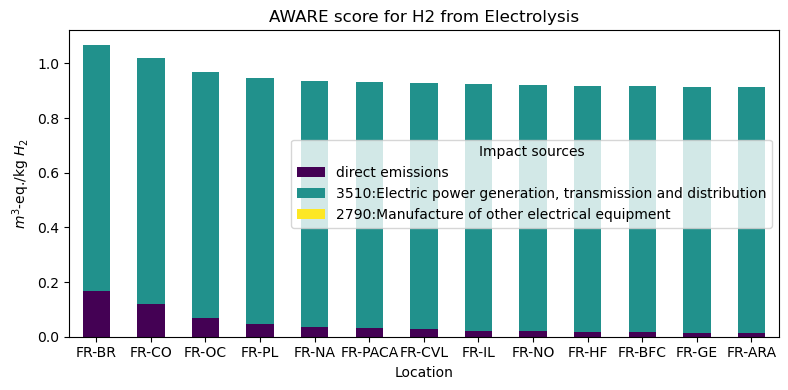

In [7]:
import matplotlib.pyplot as plt
# Prepare the data for the stacked bar chart
locations = df["location"]
values = df.loc[:, "direct emissions":]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 4))
values.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")

# Set chart details
ax.set_xticks(range(len(locations)))
ax.set_xticklabels(locations, rotation=0)
ax.set_xlabel("Location")
ax.set_ylabel("$m^3$-eq./kg $H_2$")
ax.set_title("AWARE score for H2 from Electrolysis")
plt.legend(title="Impact sources")
plt.tight_layout()

# Show the plot
plt.show()

## Technosphere edges-based LCIA

The `EdgeLCIA` class can also be used to calculate LCIA results for technosphere exchanges.

In [3]:
from edges import EdgeLCIA
import bw2data
bw2data.projects.set_current("bw25_ei310")

In [4]:
act = [a for a in bw2data.Database("ecoinvent-3.10-cutoff") if "NMC" in a["name"]][0]
act

'battery production, Li-ion, NMC811, rechargeable, prismatic' (kilogram, CN, None)

In [6]:
method = ('RELICS', 'copper')
LCA = EdgeLCIA({act: 1}, method)
LCA.lci()
LCA.lcia()
LCA.score

0.21042595441320422

### Using GeoPolRisk (under development)

In [7]:
method = ('GeoPolRisk', '2024')
LCA = EdgeLCIA({act: 1}, method)
LCA.lci()
LCA.lcia()
LCA.score

2 locations were ignored. Check .ignored_locations attribute.


0.12754066712495815

In [8]:
df = LCA.generate_cf_table()
df

Matrix type: technosphere


,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,"petroleum and gas production, onshore","natural gas, high pressure",EC,"market for natural gas, high pressure","natural gas, high pressure",EC,0.000081,0.042343,3.414592e-06
1,"petroleum and gas production, onshore","natural gas, high pressure",EC,"natural gas, burned in gas turbine","natural gas, burned in gas turbine",EC,0.000001,0.042343,5.490913e-08
2,"hard coal, import from ZA",hard coal,IN,market for hard coal,hard coal,IN,0.009212,0.007686,7.080365e-05
3,"petroleum and gas production, offshore","natural gas, high pressure",MX,"natural gas, high pressure, domestic supply wi...","natural gas, high pressure",MX,0.010588,0.059446,6.294032e-04
4,"petroleum and gas production, offshore","natural gas, high pressure",MX,"natural gas, high pressure, import from MX","natural gas, high pressure",US,0.000013,0.049182,6.211930e-07
...,...,...,...,...,...,...,...,...,...
425,"petroleum and gas production, onshore","natural gas, high pressure",TH,"market for natural gas, high pressure","natural gas, high pressure",TH,0.002203,0.055233,1.216972e-04
426,"petroleum and gas production, onshore","natural gas, high pressure",TH,"natural gas, burned in gas turbine","natural gas, burned in gas turbine",TH,0.000014,0.055233,7.543712e-07
427,"petroleum and gas production, onshore",petroleum,RU,market for petroleum,petroleum,BR,0.000056,0.002997,1.673438e-07
428,"petroleum and gas production, onshore",petroleum,RU,market for petroleum,petroleum,PE,0.000130,0.015157,1.965600e-06
